In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6083,-117.88,34.10,32.0,3357.0,621.0,1696.0,604.0,4.2685,216600.0,<1H OCEAN
5113,-118.29,33.96,36.0,1717.0,417.0,902.0,368.0,1.4868,113200.0,<1H OCEAN
5544,-118.40,33.97,38.0,1089.0,174.0,502.0,180.0,7.5953,434800.0,<1H OCEAN
19059,-122.49,38.22,33.0,1486.0,290.0,781.0,274.0,3.5647,251800.0,NEAR BAY
18916,-122.23,38.14,36.0,1412.0,260.0,792.0,268.0,2.3056,90400.0,NEAR BAY


In [3]:
housing_data = housing_data.dropna()
housing_data.shape

(20433, 10)

In [4]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [5]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [6]:
housing_data.shape

(19475, 10)

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
housing_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])

In [10]:
housing_data.shape

(19475, 14)

In [11]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14355,-117.22,32.75,26.0,617.0,112.0,251.0,110.0,3.8036,162000.0,0,0,0,0,1
7695,-118.11,33.96,29.0,2784.0,582.0,1278.0,550.0,4.3882,261600.0,1,0,0,0,0
18612,-122.07,37.08,21.0,5639.0,894.0,2670.0,871.0,6.0809,270000.0,0,0,0,0,1
13423,-117.38,34.14,11.0,10804.0,1493.0,5221.0,1482.0,5.2460,161400.0,0,1,0,0,0
729,-122.12,37.68,45.0,2179.0,401.0,1159.0,399.0,3.4839,180600.0,0,0,0,1,0


In [12]:
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data['median_house_value']

In [13]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [16]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

In [18]:
print("Training_score : ", linear_model.score(x_train, y_train) )

Training_score :  0.6149145167378576


In [19]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [25]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()


In [26]:
print(coef)

longitude                    -2.468935e+04
latitude                     -2.254392e+04
population                   -3.063319e+01
total_rooms                  -8.012065e+00
households                    4.451727e+01
total_bedrooms                9.557367e+01
housing_median_age            9.308116e+02
median_income                 3.862005e+04
ocean_proximity_INLAND        5.118961e+17
ocean_proximity_NEAR BAY      5.118961e+17
ocean_proximity_<1H OCEAN     5.118961e+17
ocean_proximity_NEAR OCEAN    5.118961e+17
ocean_proximity_ISLAND        5.118961e+17
dtype: float64


In [27]:
y_pred = linear_model.predict(x_test)

In [28]:
df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})

In [29]:
df_pred_actual.head(10)

,predicted,actual
7648,238272.0,200300.0
11953,155648.0,113900.0
13550,109568.0,67000.0
10904,124160.0,123200.0
11485,271488.0,255700.0
3741,207936.0,223800.0
7267,162240.0,175000.0
3046,113728.0,65800.0
7501,153408.0,104600.0
18682,268032.0,290400.0


In [31]:
from sklearn.metrics import r2_score
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6048987310847259


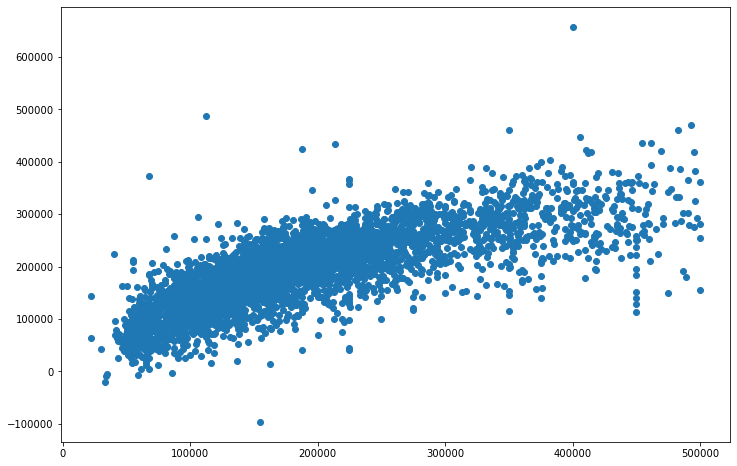

In [32]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.show()

In [34]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [35]:
df_pred_actual_sample.head()

,index,predicted,actual
0,14253,114624.0,86900.0
1,20000,88256.0,112500.0
2,13351,180416.0,195100.0
3,10533,282880.0,268500.0
4,7149,167936.0,180500.0


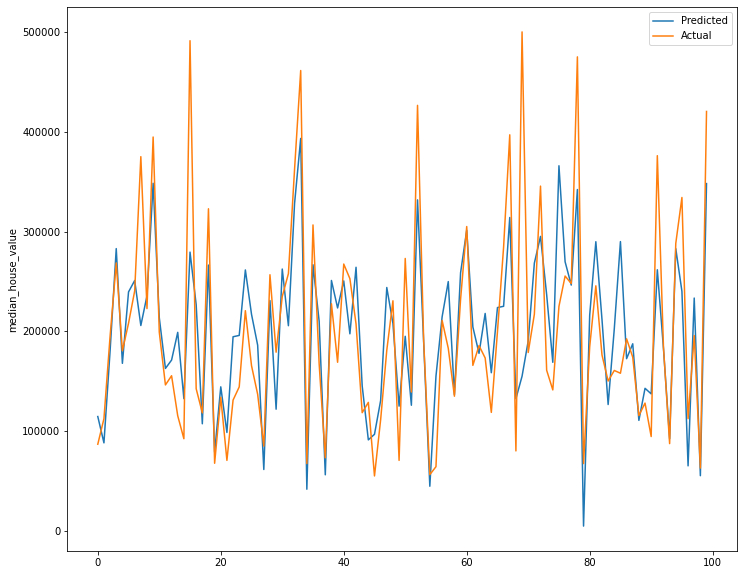

In [36]:
plt.figure(figsize = (12,10))
plt.plot(df_pred_actual_sample['predicted'], label = 'Predicted')
plt.plot(df_pred_actual_sample['actual'], label = 'Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()